"""
                          
    FileName:   cnn_model_aB9    -v3   
    Date:       4/26/18 08:04 PM   
    Author:     aB9           
                                
"""

In [1]:
# Import libraries
import os, shutil

from keras import models, optimizers
from keras import layers
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf

C:\Users\abhi0\Anaconda3\envs\py35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Directories
base_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir+ os.sep + os.pardir)

dataset = os.path.join(base_dir,'dataset')
dataset_train =  os.path.join(dataset,'Training_Data')
dataset_test =  os.path.join(dataset,'Test_Data')
train_waterbodies = os.path.join(dataset_train,'water')
train_no_waterbodies =os.path.join(dataset_train,'waterless')
test_waterbodies = os.path.join(dataset_test, 'water')
test_no_waterbodies = os.path.join(dataset_test,  'waterless')

augmented_images_dir = os.path.join(dataset,'augmented_images')

In [3]:
#Paramters
image_height , image_width = 128,128

In [4]:
# Creating the model (Sequential)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), input_shape=(image_height, image_width, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the network
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       147584    
__________

In [5]:
# Configure model for training
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


In [6]:
# Adding Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=90, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(dataset_train, target_size=(image_height,image_width), batch_size=20, class_mode='binary',save_to_dir=augmented_images_dir)

validation_generator = validation_datagen.flow_from_directory(dataset_test, target_size=(image_height,image_width), batch_size=20, class_mode='binary')

Found 1429 images belonging to 2 classes.
Found 358 images belonging to 2 classes.


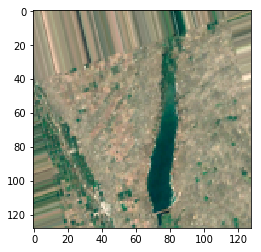

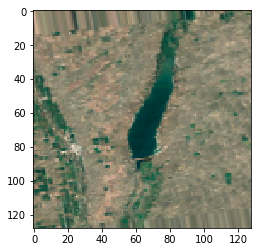

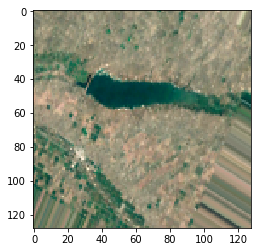

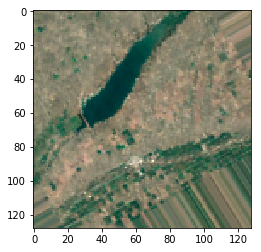

In [7]:
#Display randomly augmented training image
images_list = [os.path.join(train_waterbodies, image_name) for image_name in os.listdir(train_waterbodies)]

#Any random image
random_image_path = images_list[9]

img  = image.load_img(random_image_path,target_size=(image_height,image_width))

numpy_image_array = image.img_to_array(img)

numpy_image_array = numpy_image_array.reshape((1,)+numpy_image_array.shape)

i = 0
for batch in train_datagen.flow(numpy_image_array, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 4 == 0:
        break

plt.show()
                    

In [8]:
#Fitting the model
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 60s 602ms/step - loss: 0.6109 - acc: 0.7075 - val_loss: 0.6171 - val_acc: 0.6586
Epoch 2/30
100/100 [==============================] - 55s 548ms/step - loss: 0.5954 - acc: 0.7126 - val_loss: 0.6410 - val_acc: 0.6627
Epoch 3/30
100/100 [==============================] - 54s 545ms/step - loss: 0.5825 - acc: 0.7137 - val_loss: 0.6757 - val_acc: 0.6616
Epoch 4/30
100/100 [==============================] - 54s 543ms/step - loss: 0.5523 - acc: 0.7200 - val_loss: 0.6469 - val_acc: 0.7149
Epoch 5/30
100/100 [==============================] - 53s 534ms/step - loss: 0.4874 - acc: 0.7838 - val_loss: 0.6282 - val_acc: 0.7470
Epoch 6/30
100/100 [==============================] - 60s 599ms/step - loss: 0.4635 - acc: 0.8092 - val_loss: 0.6465 - val_acc: 0.7249
Epoch 7/30
100/100 [==============================] - 56s 556ms/step - loss: 0.4127 - acc: 0.8293 - val_loss: 0.8215 - val_acc: 0.7339
Epoch 8/30
100/100 [==============================] - 5

In [9]:
h5_dir = os.path.join(base_dir,'h5')
model.save(h5_dir+os.sep+'cnn_model_aB9_v3.h5')

In [10]:

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print(sess)


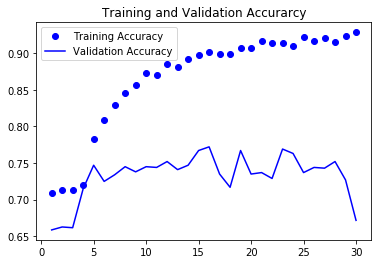

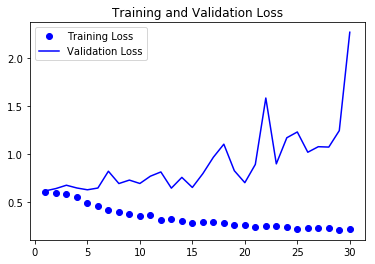

In [11]:
#Display loss and accuracy curves on training data
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc,'bo', label='Training Accuracy')
plt.plot(epochs, val_acc,'b', label='Validation Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')

plt.legend()

plt.show()